# Analysis 
This notebook reads in the cleaned data and analyses the relationships between the columns

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline 

## Read data 
Column definitions:  
  
| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survived | Survived                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex	   | Sex	                                    | 0 = Female, 1 = Male                           |
| Age	   | Age in years	                            |                                                |
| sibsp	   | # of siblings / spouses aboard the Titanic |	                                             |
| parch	   | # of parents / children aboard the Titanic	|                                                |
| fare	   | Passenger fare	                            |                                                |
| embarked | Port of Embarkation                        | 0 = Southampton, 1 = Cherbourg, 2 = Queenstown |

In [3]:
train = pd.read_csv("./data/clean/train.csv")
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,0
1,1,1,0,38,1,0,71.2833,1
2,1,3,0,26,0,0,7.9250,0
3,1,1,0,35,1,0,53.1000,0
4,0,3,1,35,0,0,8.0500,0


## Explore how features interact with eachother

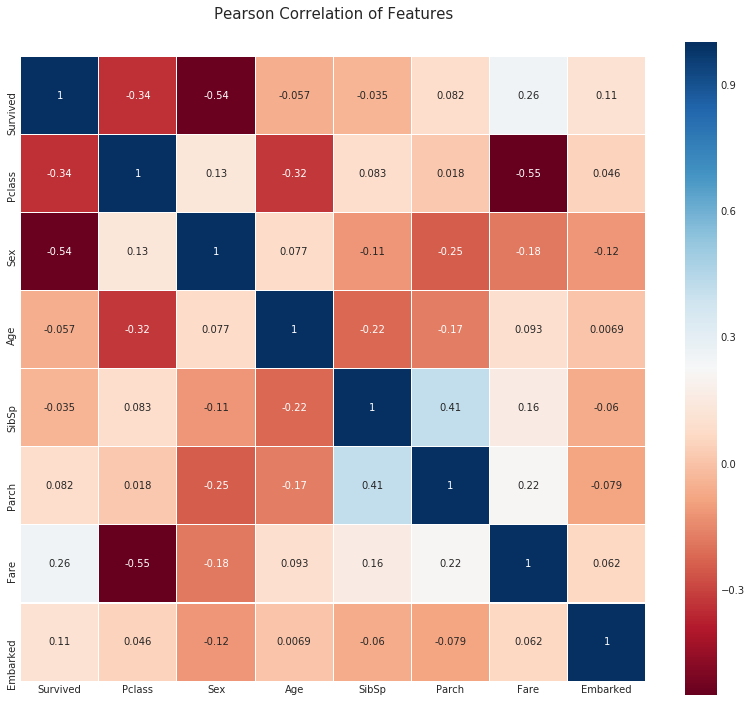

In [4]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

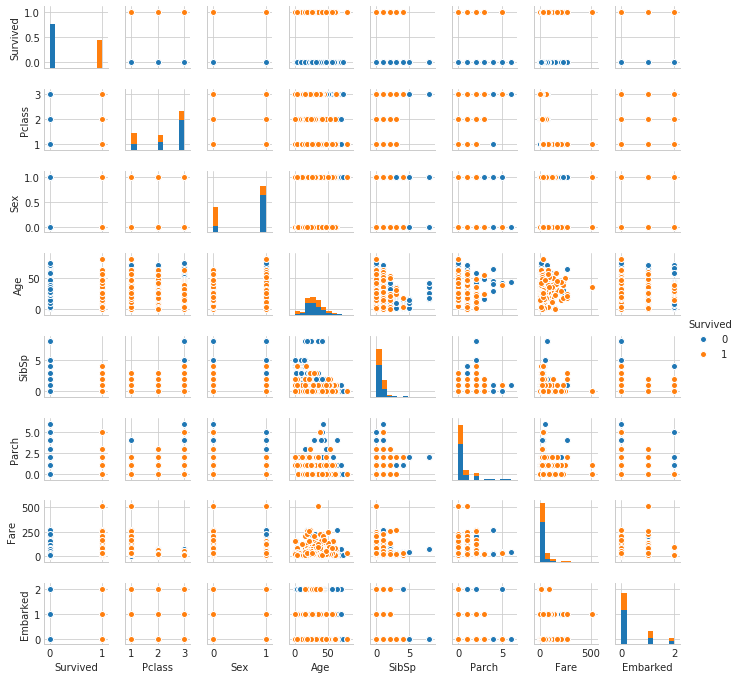

In [8]:
sns.pairplot(train, hue="Survived", size=1.2)

## Explore how features interact with survival

Create a pearson correlation of features compared to survival

In [19]:
train.astype(float).corr().Survived.sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Embarked    0.106811
Parch       0.081629
SibSp      -0.035322
Age        -0.056880
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

### Pclass
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

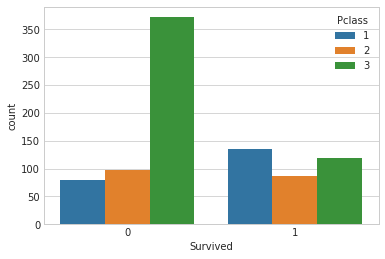

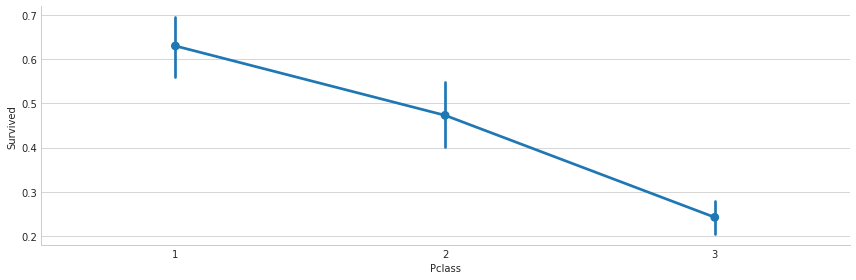

In [9]:
sns.countplot(x="Survived", hue="Pclass", data=train)
sns.factorplot("Pclass","Survived", data=train, size=4, aspect=3)

### Sex
0 = Female  
1 = Male

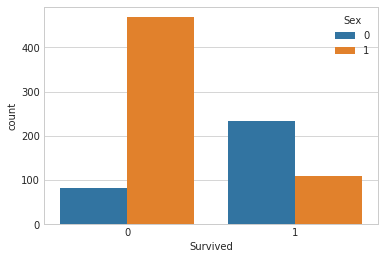

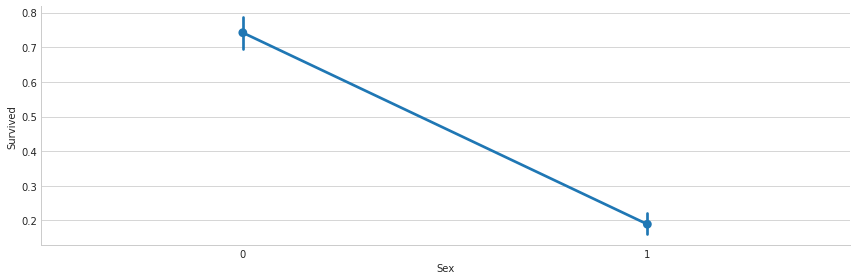

In [10]:
sns.countplot(x="Survived", hue="Sex", data=train)
sns.factorplot("Sex","Survived", data=train, size=4, aspect=3)

### Age
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

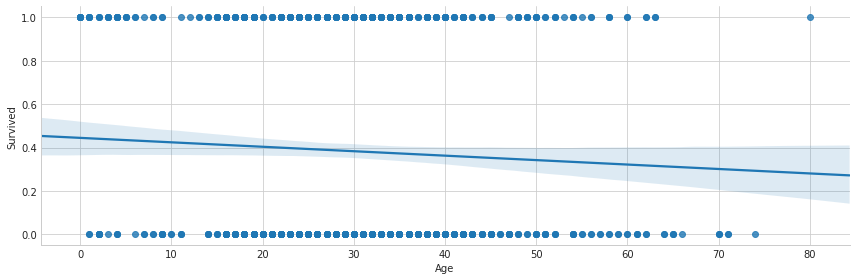

In [11]:
sns.lmplot("Age","Survived", data=train, size=4, aspect=3)

### SibSp
sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

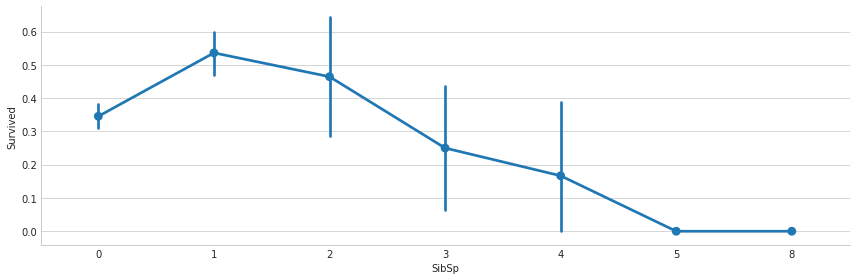

In [12]:
sns.factorplot("SibSp","Survived", data=train, size=4, aspect=3)

### Parch
parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

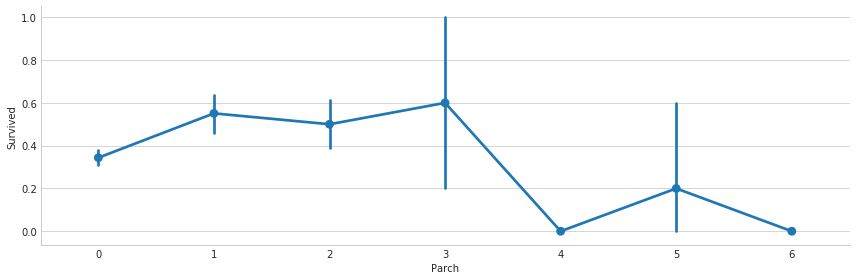

In [13]:
sns.factorplot("Parch","Survived", data=train, size=4, aspect=3)

### Fare

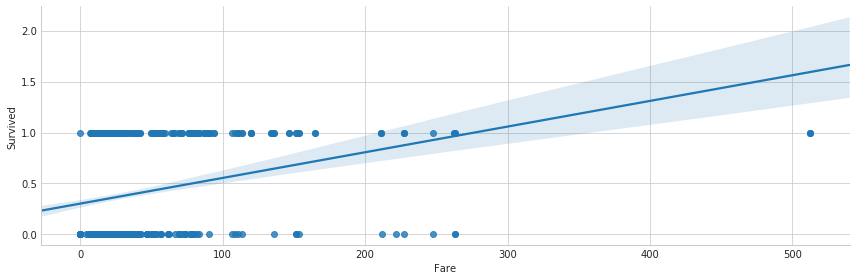

In [14]:
sns.lmplot("Fare","Survived", data=train, size=4, aspect=3)

### Embarked
0 = Southampton  
1 = Cherbourg  
2 = Queenstown

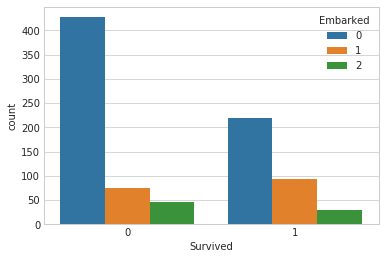

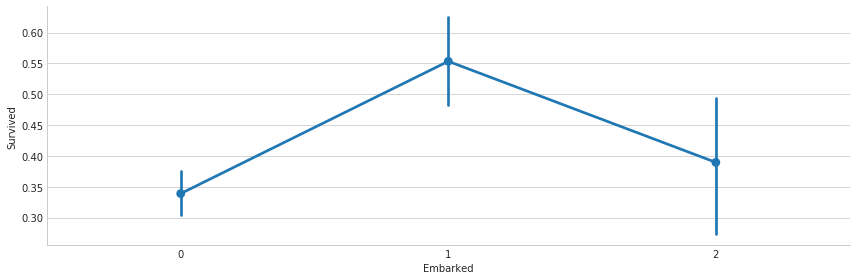

In [15]:
sns.countplot(x="Survived", hue="Embarked", data=train)
sns.factorplot("Embarked","Survived", data=train, size=4, aspect=3)